<a href="https://colab.research.google.com/github/ryhanshireen/countdown/blob/main/ERRPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INITIAL CONFIGURATIONS

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, DepthwiseConv2D, InputLayer, BatchNormalization

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

ALL RELATED TO IMAGE PROCESSING

In [2]:
data_dir = '/content/drive/MyDrive/data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for imgclass in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, imgclass)):
    imagePath = os.path.join(data_dir, imgclass, image)
    try:
      img = cv2.imread(imagePath)
      tip = imghdr.what(imagePath)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(imagePath))
        os.remove(imagePath)
    except:
      print('Issue with image {}'.format(imagePath))

In [3]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


Found 263 files belonging to 2 classes.


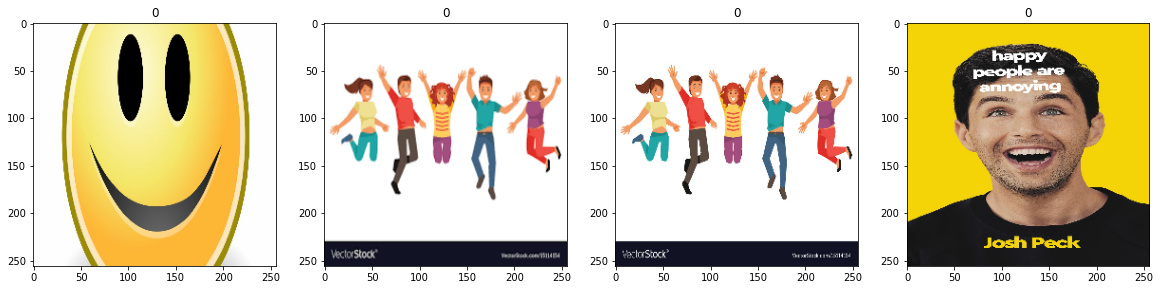

In [4]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

PREPROCESSING

In [5]:
len(data)

9

In [6]:
data = data.map(lambda x, y: (x/255, y))
data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

CNN MODEL

In [7]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
test = Sequential()

test.add(InputLayer(input_shape=(64,128,1)))

test.add(Conv2D(4, kernel_size=(4,8), strides=1,  activation='relu', padding='same'))
test.add(BatchNormalization())
test.add(Conv2D(8, kernel_size=(8,16), strides=1,  activation='relu', padding='same'))
test.add(BatchNormalization())
test.add(Conv2D(16, kernel_size=(16,32), strides=1,  activation='relu', padding='same'))
test.add(BatchNormalization())
test.add(Conv2D(32, kernel_size=(32,64), strides=1,  activation='relu', padding='same'))
test.add(BatchNormalization())

test.add(DepthwiseConv2D(kernel_size=(64,1), activation= 'relu', padding='valid', depth_multiplier=2))
test.add(BatchNormalization())

#test.add(MaxPooling2D())

#test.add(Dropout())

test.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 64, 128, 4)        132       
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 4)       16        
 ormalization)                                                   
                                                                 
 conv2d_53 (Conv2D)          (None, 64, 128, 8)        4104      
                                                                 
 conv2d_54 (Conv2D)          (None, 64, 128, 16)       65552     
                                                                 
 conv2d_55 (Conv2D)          (None, 64, 128, 32)       1048608   
                                                                 
 depthwise_conv2d_9 (Depthwi  (None, 1, 128, 64)       4160      
 seConv2D)                                           